## Task 4

### Global terrorism

##### Level (Intermediate)

The GTI therefore defines terrorism as “the threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation”.

<img src="Terrorism-Word-Cloud.png" height=500 width=1000>

In [1]:
##Import the requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [2]:
#Load the data
gb=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
gb.head()

C:\Users\Praneeth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [3]:
#Get the shape
gb.shape

(181691, 135)

In [4]:
#Filter the columns and select the appropraite variables for the reports 
gb_new=gb[['iyear', 'imonth', 'iday','country', 'country_txt', 'region', 'region_txt','city', 'latitude', 'longitude', 'specificity',
       'vicinity','success', 'suicide', 'attacktype1', 'attacktype1_txt','targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
        'target1', 'natlty1', 'natlty1_txt','weaptype1','weaptype1_txt','gname']]
gb_new.head()

,iyear,imonth,iday,country,country_txt,region,region_txt,city,latitude,longitude,specificity,vicinity,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,natlty1,natlty1_txt,weaptype1,weaptype1_txt,gname
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1.0,0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,Julio Guzman,58.0,Dominican Republic,13,Unknown,MANO-D
1,1970,0,0,130,Mexico,1,North America,Mexico city,19.371887,-99.086624,1.0,0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",21.0,Belgium,13,Unknown,23rd of September Communist League
2,1970,1,0,160,Philippines,5,Southeast Asia,Unknown,15.478598,120.599741,4.0,0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Employee,217.0,United States,13,Unknown,Unknown
3,1970,1,0,78,Greece,8,Western Europe,Athens,37.997490,23.762728,1.0,0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Embassy,217.0,United States,6,Explosives,Unknown
4,1970,1,0,101,Japan,4,East Asia,Fukouka,33.580412,130.396361,1.0,0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Consulate,217.0,United States,8,Incendiary,Unknown


In [5]:
#Drop the duplicates
gb_new.drop_duplicates(inplace=True)

<ipython-input-5-d3e4fbe54705>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gb_new.drop_duplicates(inplace=True)


In [6]:
#After filetring and dropping dupilicates then check the data shape 
print('-------Before--------')
print('Number of columns: ',gb.shape[1])
print('Number of observations: ',gb.shape[0],'\n')
print("-------After---------")
print('Number of columns: ',gb_new.shape[1])
print('Number of observations: ',gb_new.shape[0])

-------Before--------
Number of columns:  135
Number of observations:  181691 

-------After---------
Number of columns:  26
Number of observations:  169534


In [7]:
#Check any null values are present in the data
miss_data=pd.DataFrame({'Missing_values':gb_new.isnull().sum(),'Percentage':(gb_new.isnull().sum()/gb_new.shape[0])*100})
miss_data

,Missing_values,Percentage
iyear,0,0.000000
imonth,0,0.000000
iday,0,0.000000
country,0,0.000000
country_txt,0,0.000000
region,0,0.000000
region_txt,0,0.000000
city,430,0.253636
latitude,3995,2.356459
longitude,3996,2.357049


In [8]:
#Drop the null values
gb1=gb_new.copy()
gb1.dropna(inplace=True)

In [9]:
#After dropping null values
gb1.isnull().sum()

iyear               0
imonth              0
iday                0
country             0
country_txt         0
region              0
region_txt          0
city                0
latitude            0
longitude           0
specificity         0
vicinity            0
success             0
suicide             0
attacktype1         0
attacktype1_txt     0
targtype1           0
targtype1_txt       0
targsubtype1        0
targsubtype1_txt    0
target1             0
natlty1             0
natlty1_txt         0
weaptype1           0
weaptype1_txt       0
gname               0
dtype: int64

No missing values are present in the data, then we can go ahead for further steps.

In [10]:
print("Countrys with highest terrorist attacks: ",gb1['country_txt'].value_counts().index[0])
print("Region with highest attacks: ",gb1['region_txt'].value_counts().index[0])
print('Citys with highest attacks: ',gb1['city'].value_counts().index[0])

Countrys with highest terrorist attacks:  Iraq
Region with highest attacks:  Middle East & North Africa
Citys with highest attacks:  Baghdad


In [11]:
print("Countrys with highest terrorist attacks: ",gb1['country_txt'].value_counts().index[-1])
print("Region with highest attacks: ",gb1['region_txt'].value_counts().index[-1])
print('Citys with highest attacks: ',gb1['city'].value_counts().index[-1])

Countrys with highest terrorist attacks:  North Korea
Region with highest attacks:  Australasia & Oceania
Citys with highest attacks:  Teupin Peunti


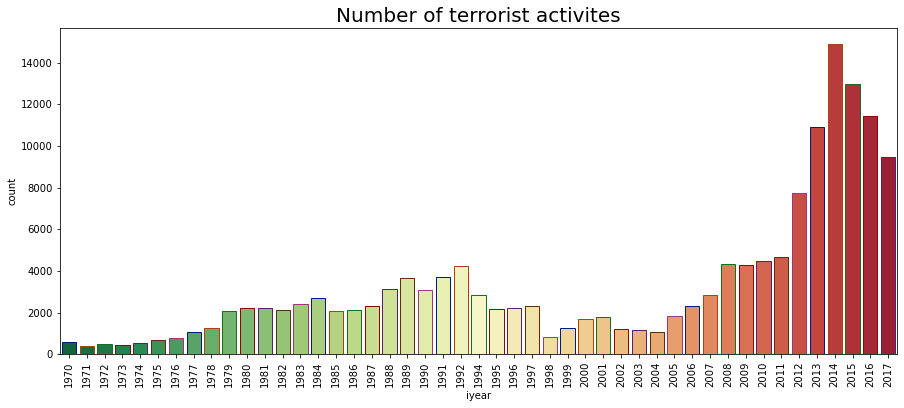

In [12]:
#Terrorist activites each year
plt.subplots(figsize=(15,6))
sns.countplot(gb1['iyear'],palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number of terrorist activites',fontsize=20)
plt.show()

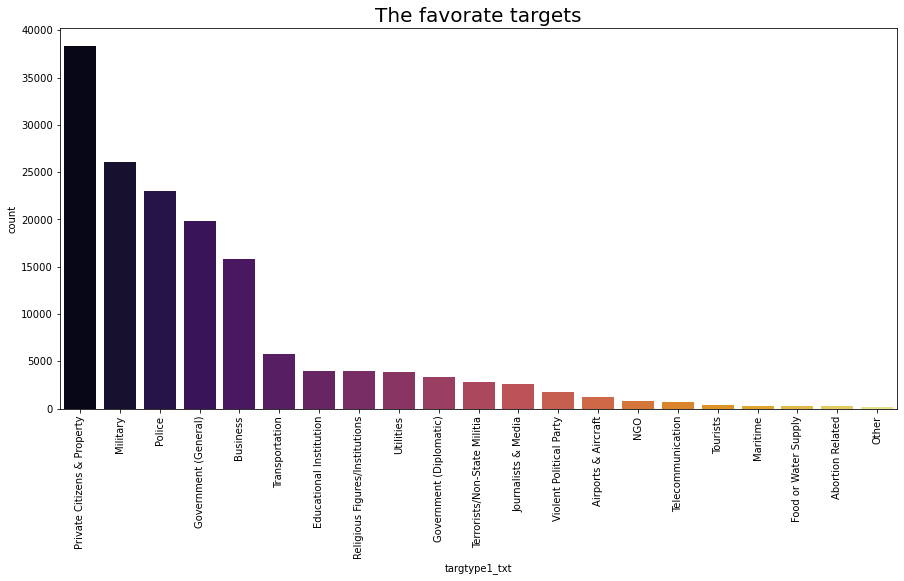

In [13]:
#Terrorist who target the most
plt.subplots(figsize=(15,7))
sns.countplot(gb1['targtype1_txt'],palette='inferno',order=gb1['targtype1_txt'].value_counts().index)
plt.title('The favorate targets',fontsize=20)
plt.xticks(rotation=90)
plt.show()

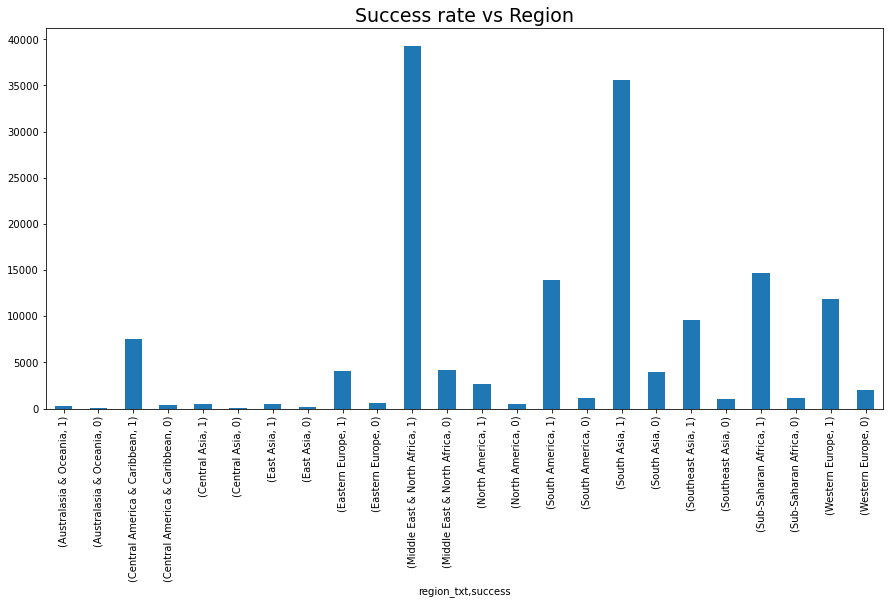

In [14]:
#Display in which region the success rate is high
plt.figure(figsize=(15,7))
gb1.groupby('region_txt')['success'].value_counts().plot.bar()
plt.title("Success rate vs Region",fontsize=19)
plt.show()

The middle east & North africa and South asia is comparativle very high success rate in terrorism act.

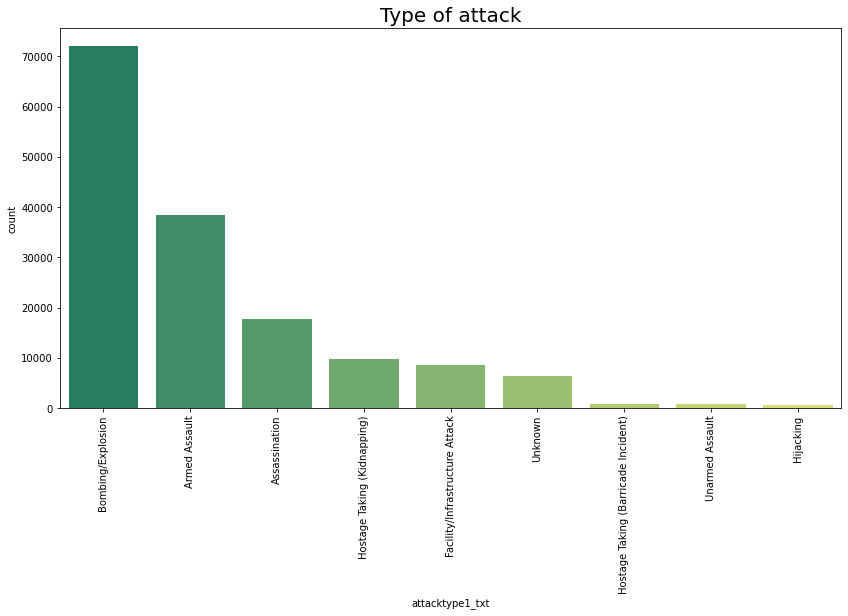

In [15]:
plt.figure(figsize=(14,7))
sns.countplot(gb1['attacktype1_txt'],palette='summer',order=gb1['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Type of attack',fontsize=20)
plt.show()

Most of the attacks done by the Bombing/Explosion and low by Hijacking,Unarmed assault and Hostage taking.

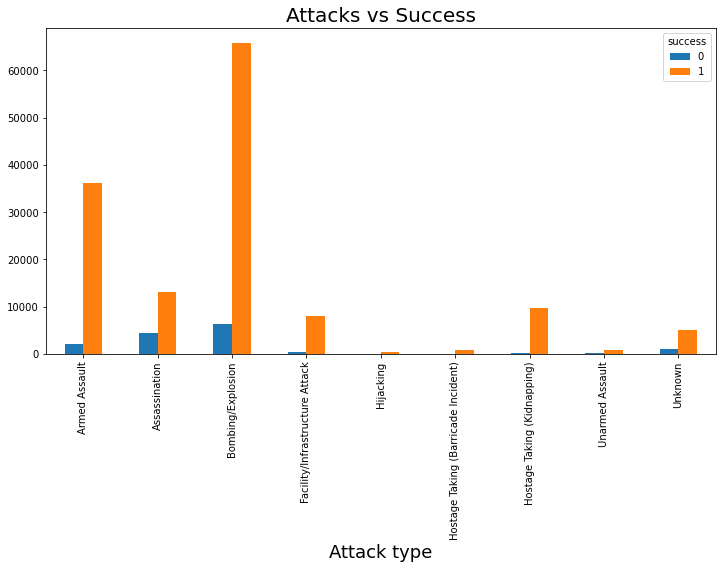

In [16]:
#How much is the success rate when the type of attacks is involved
pd.crosstab(gb1['attacktype1_txt'],gb1['success']).plot.bar(figsize=(12,6))
plt.title('Attacks vs Success',fontsize=20)
plt.xlabel('Attack type',fontsize=18)
plt.show()

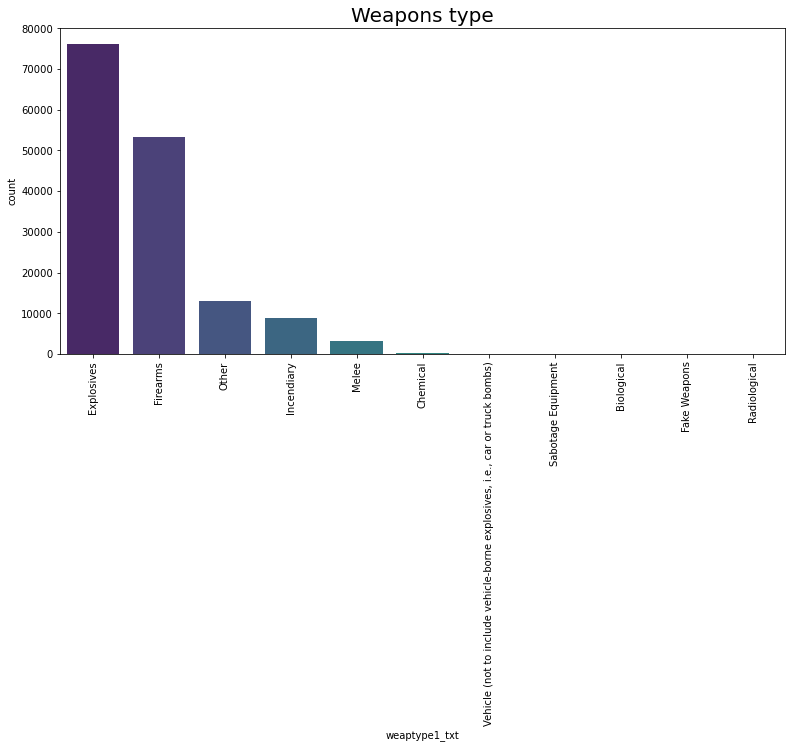

In [17]:
#Replace 'Unknown' weapon type in to Other 
gb1['weaptype1_txt'].replace("Unknown","Other",inplace=True)
#Display the type of weapons used to attack
plt.figure(figsize=(13,6))
sns.countplot(gb1['weaptype1_txt'],palette='viridis',order=gb1['weaptype1_txt'].value_counts().index)
plt.title('Weapons type',fontsize=20)
plt.xticks(rotation=90)
plt.show()

The success rate is too high when we compared to the type of attack is Bombing/Explosion and low with hijacking.

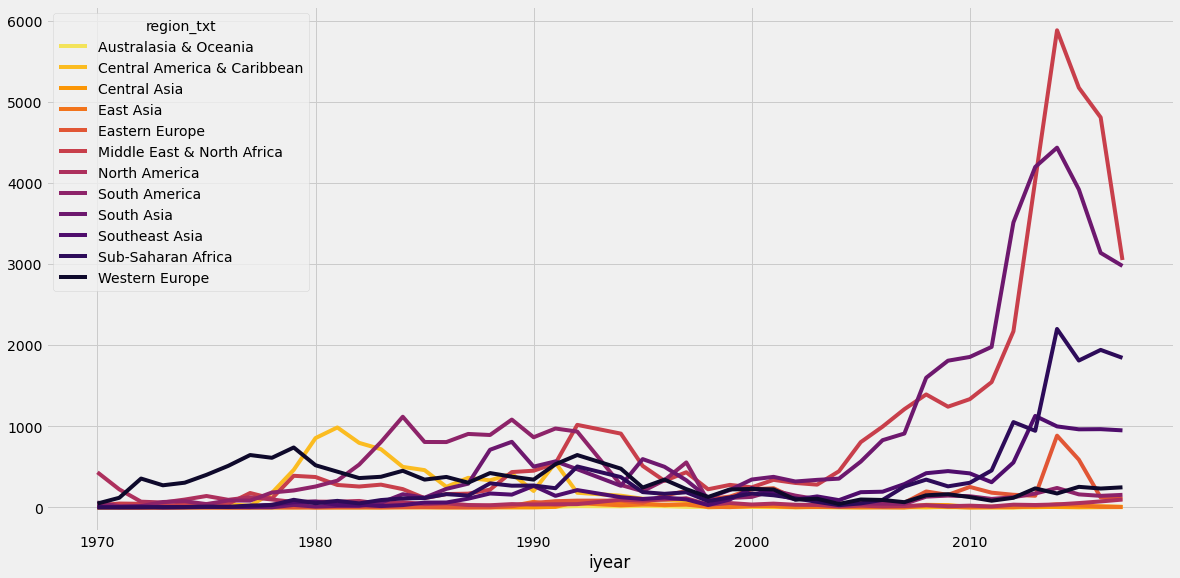

In [18]:
g=pd.crosstab(gb1['iyear'],gb1['region_txt'])
plt.style.use('fivethirtyeight')
g.plot(color=sns.color_palette('inferno_r',12))
fig=plt.gcf()
fig.set_size_inches(18,9)
plt.show()

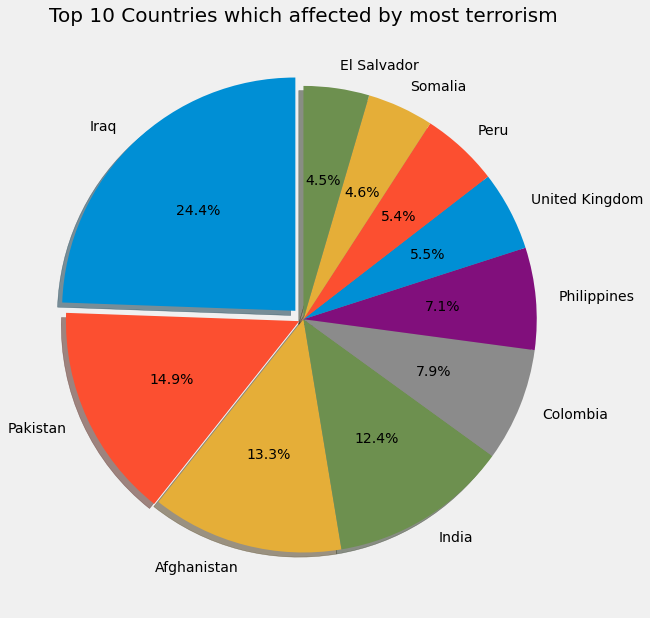

In [19]:
#Top 10 countries which getting affected by the terrorism act
top_10=gb1['country_txt'].value_counts().head(10)
plt.figure(figsize=(11,10))
plt.pie(top_10.values,labels=list(top_10.index),startangle=90,explode=[0.05,0.02,0,0,0,0,0,0,0,0],center=(0,0),autopct='%1.1f%%',shadow=True)
plt.title('Top 10 Countries which affected by most terrorism',fontsize=20)
plt.show()

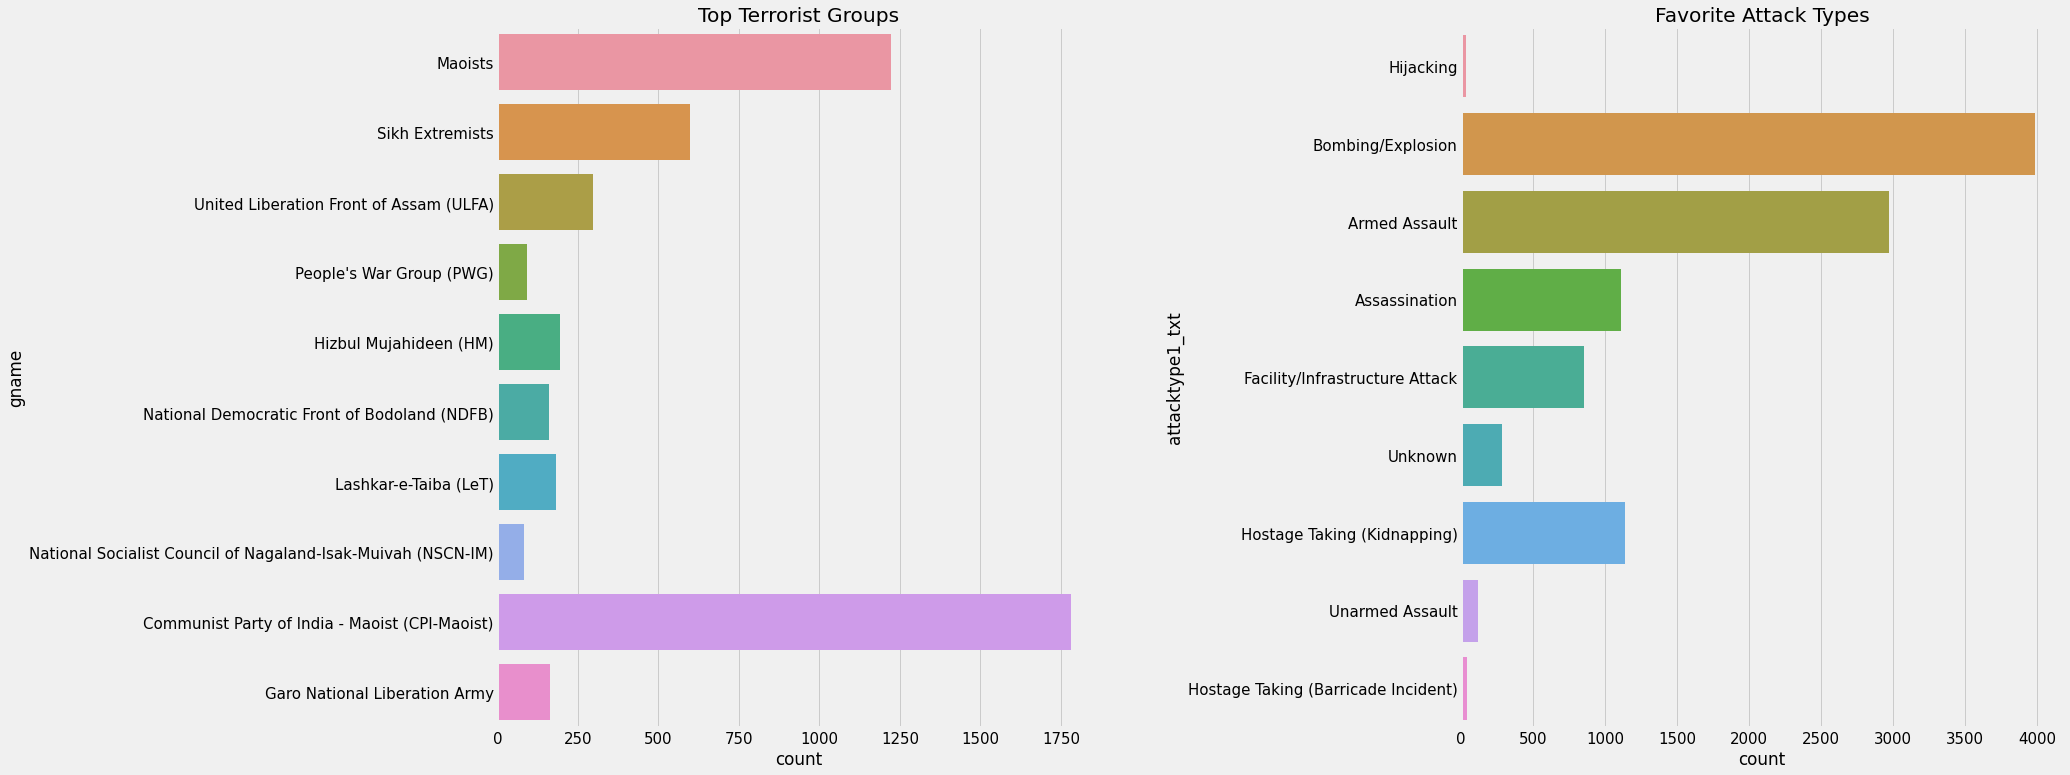

In [20]:
#Top groups and their favorate attacks
ind_data=gb1[gb1['country_txt'] == 'India']
f,ax=plt.subplots(1,2,figsize=(25,12))
ind_groups=ind_data['gname'].value_counts()[1:11].index
ind_groups=ind_data[ind_data['gname'].isin(ind_groups)]
sns.countplot(y='gname',data=ind_groups,ax=ax[0])
ax[0].set_title('Top Terrorist Groups')
sns.countplot(y='attacktype1_txt',data=ind_data,ax=ax[1])
ax[1].set_title('Favorite Attack Types')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

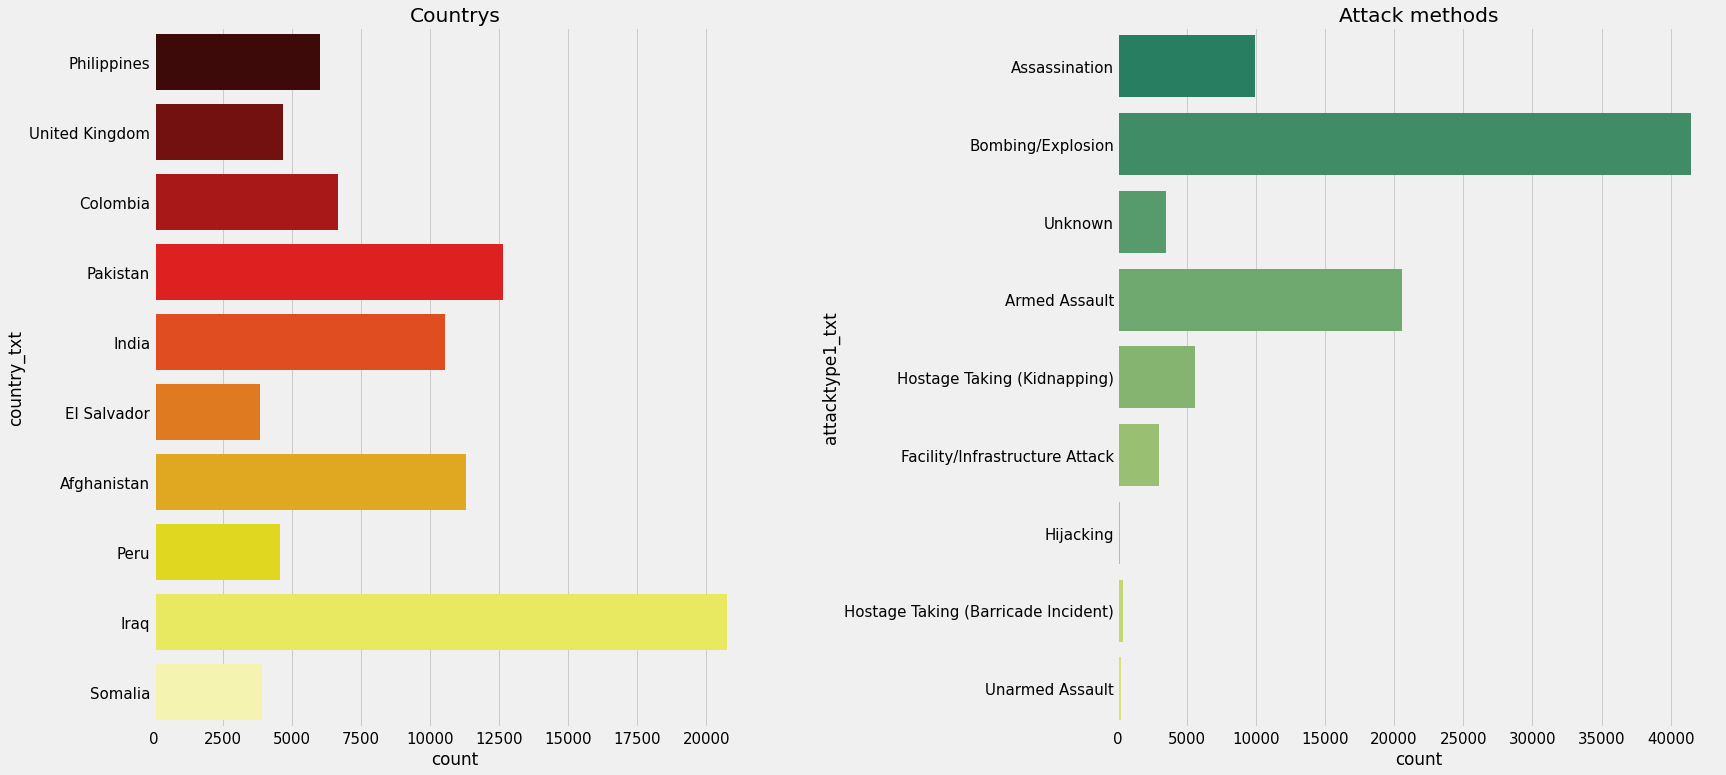

In [21]:
#Show top 10 cityes with the most attacked methods
fig,ax=plt.subplots(1,2,figsize=(25,12))
gh=gb1['country_txt'].value_counts().index[:10]
hg=gb1[gb1['country_txt'].isin(gh)]
sns.countplot(y='country_txt',data=hg,palette='hot',ax=ax[0])
ax[0].set_title('Countrys')
sns.countplot(y='attacktype1_txt',data=hg,palette='summer',ax=ax[1])
ax[1].set_title('Attack methods')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

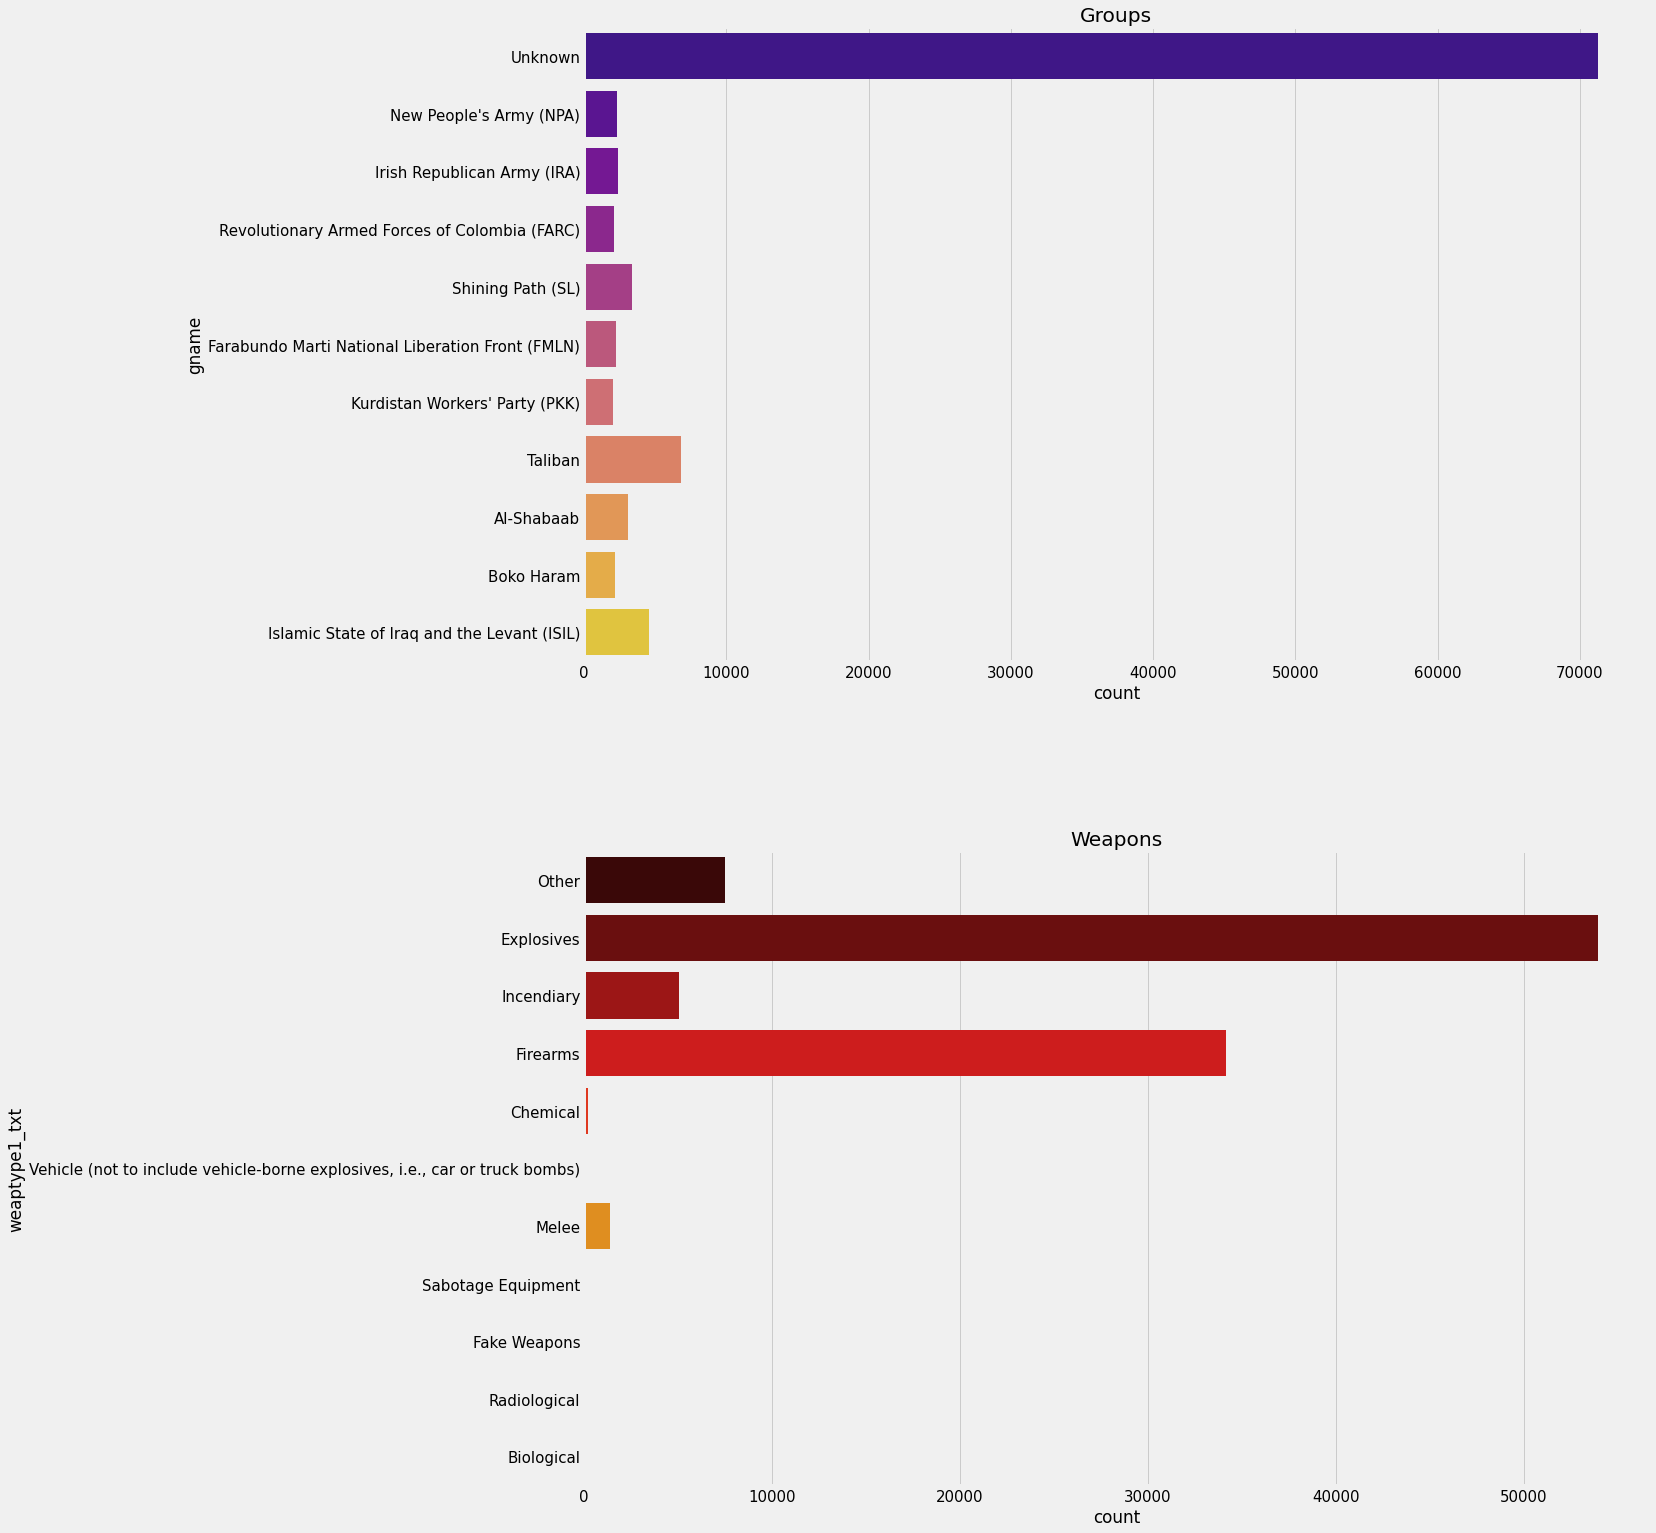

In [22]:
#Top terrorists and their weapons types
fig,ax=plt.subplots(2,1,figsize=(17,25))
terr=gb1['gname'].value_counts().index[:11]
ter1=gb1[gb1['gname'].isin(terr)]
sns.countplot(y='gname',data=ter1,palette='plasma',ax=ax[0])
ax[0].set_title('Groups')
sns.countplot(y='weaptype1_txt',data=ter1,palette='hot',ax=ax[1])
ax[1].set_title('Weapons')
plt.subplots_adjust(hspace=0.3,wspace=0.3)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

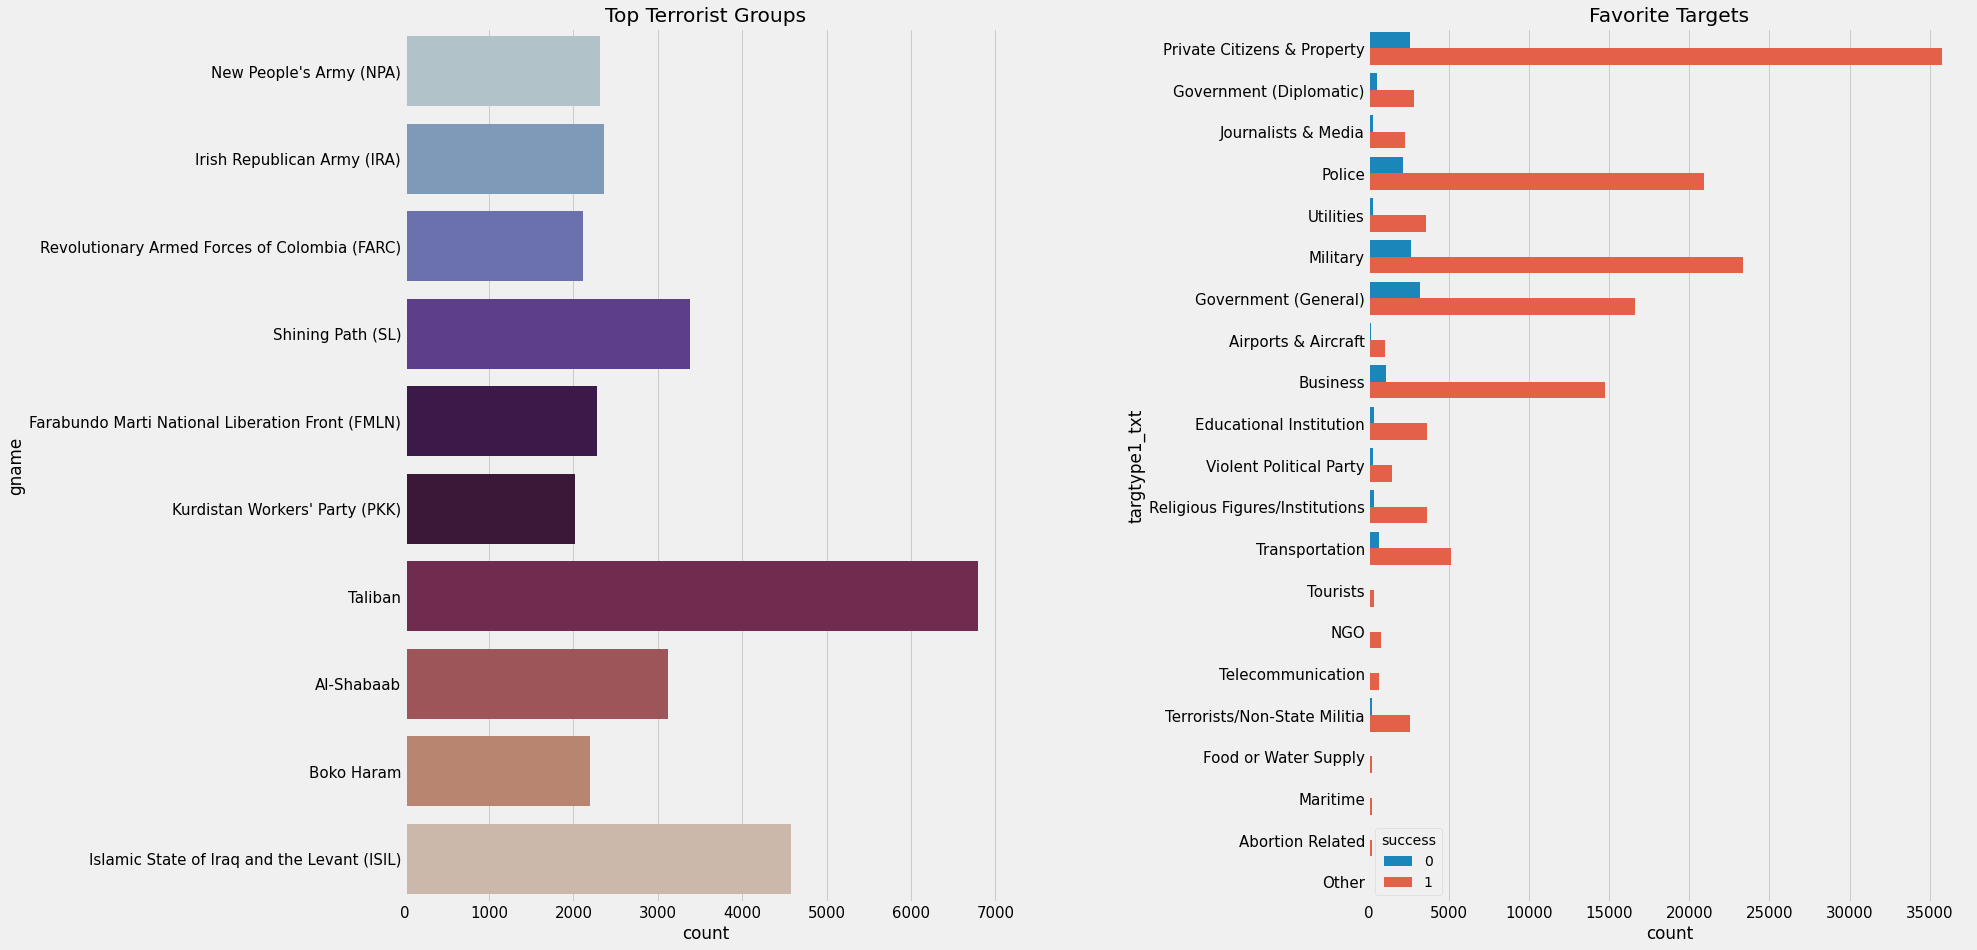

In [50]:
#Top 10 terrorits groups and their favorate targets (Success rate on vaious organisations such as targets "0" or "1")
f,ax=plt.subplots(1,2,figsize=(25,15))
ter_grp=gb1['gname'].value_counts()[1:11].index
ter_grp=gb1[gb1['gname'].isin(ter_grp)]
sns.countplot(y='gname',data=ter_grp,ax=ax[0],palette='twilight')
ax[0].set_title('Top Terrorist Groups')
sns.countplot(y='targtype1_txt',data=gb1,hue='success',ax=ax[1])
ax[1].set_title('Favorite Targets')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

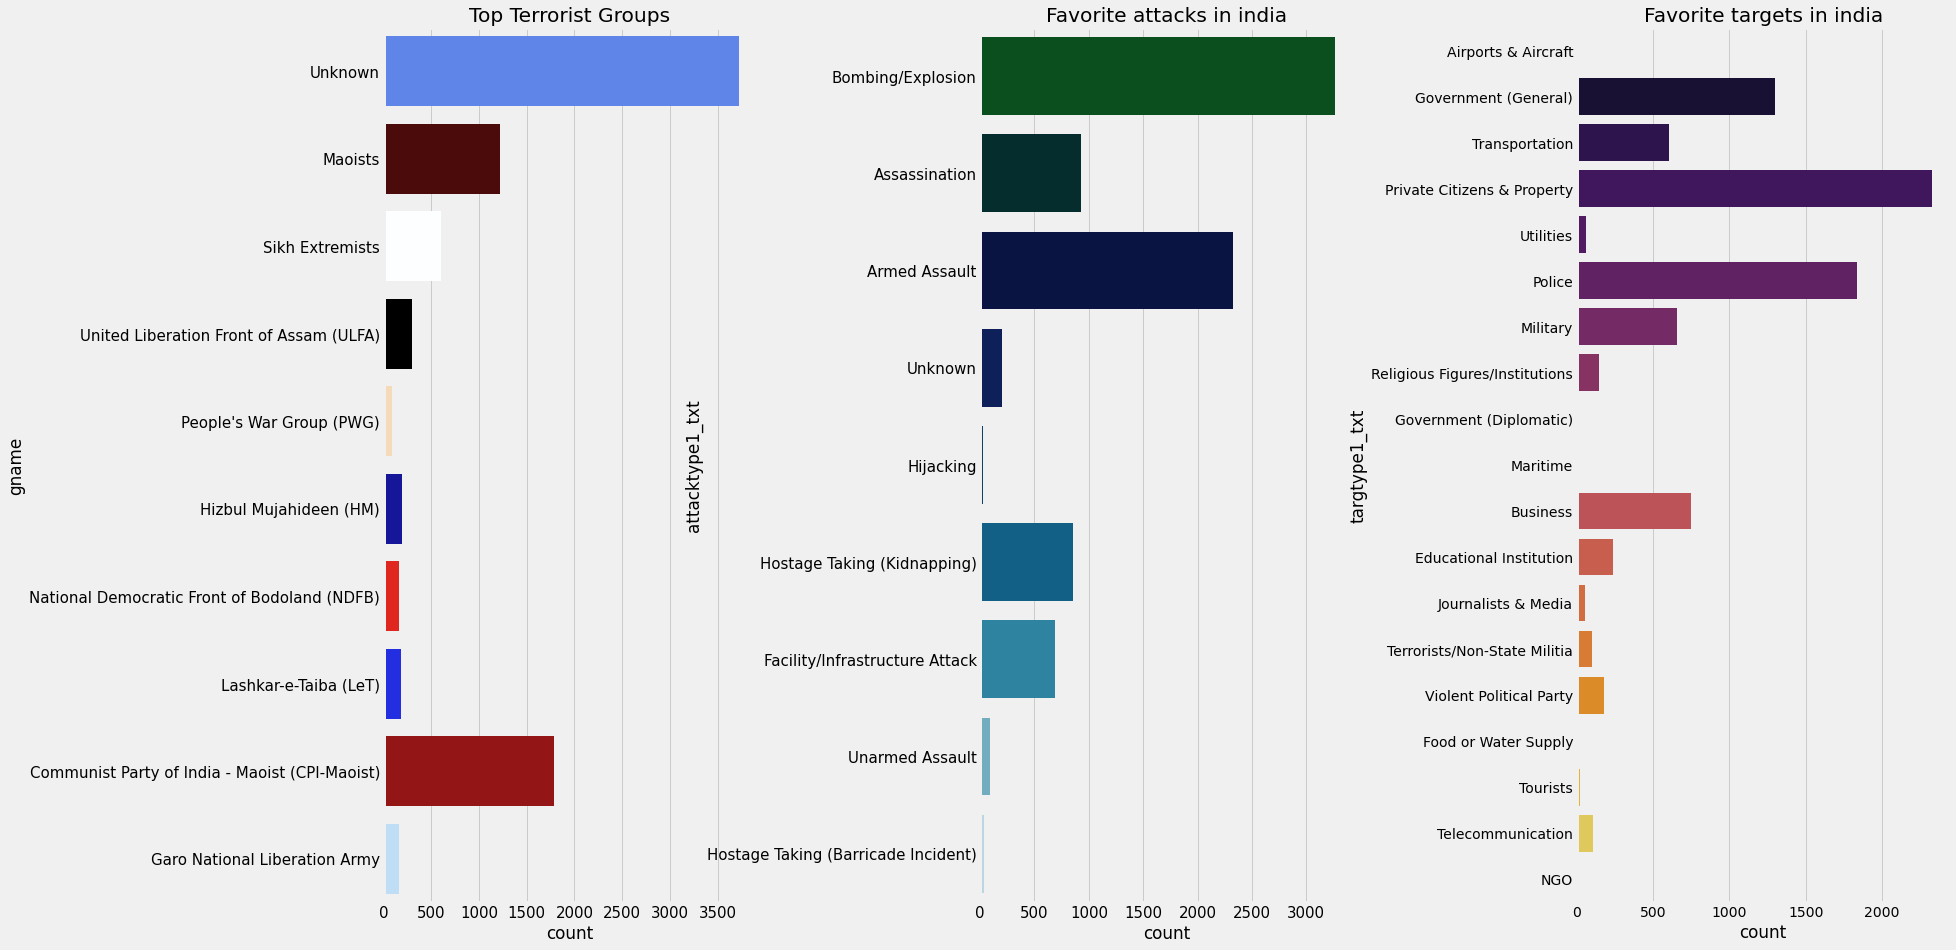

In [63]:
#In india top torroris groups and thier favorate attacks,targets
coun_data=gb1[gb1['country_txt']=='India']
gr_ind=jk['gname'].value_counts().index[:10]
gr_ind_1=jk[jk['gname'].isin(gr)]


f,ax=plt.subplots(1,3,figsize=(25,15))
sns.countplot(y='gname',data=gr_ind_1,ax=ax[0],palette='flag')
ax[0].set_title('Top Terrorist Groups')
sns.countplot(y='attacktype1_txt',data=gr_ind_1,ax=ax[1],palette='ocean')
ax[1].set_title('Favorite attacks in india')
sns.countplot(y='targtype1_txt',data=gr_ind_1,ax=ax[2],palette='inferno')
ax[2].set_title('Favorite targets in india')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()